In [303]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime as dt

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [175]:
one = pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv') # 고객 성별
two = pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv')
three = pd.read_csv('LPOINT_BIG_COMP_03_COP_U.csv')
four = pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv')
five = pd.read_csv('LPOINT_BIG_COMP_05_BR.csv')
six = pd.read_csv('LPOINT_BIG_COMP_06_LPAY.csv')

C:\pythontemp\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
one

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


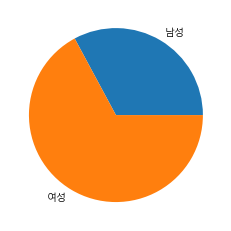

,cust
ma_fem_dv,
남성,9830
여성,20083


In [5]:
#1-1. 성별 별 분포
a=one[['cust','ma_fem_dv']].groupby('ma_fem_dv').count() 
plt.pie(a['cust'],labels=a.index)
plt.show()
a

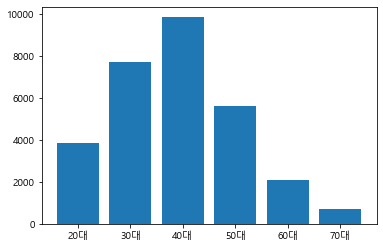

,cust
ages,
20대,3853
30대,7736
40대,9863
50대,5633
60대,2115
70대,713


In [6]:
#1-2. 연령대 별 분포
b=one[['cust','ages']].groupby('ages').count() 
plt.bar(b.index,b['cust'])
plt.show()
b

one[['cust','ages']].groupby('ages').count() #1-2. 연령대별 분포

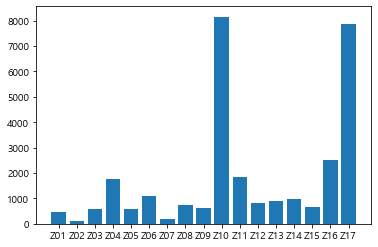

,cust
zon_hlv,
Z01,474
Z02,103
Z03,600
Z04,1750
Z05,576
Z06,1080
Z07,204
Z08,739
Z09,642


In [7]:
#1-3 .거주지대별 분포
c=one[['cust','zon_hlv']].groupby('zon_hlv').count() 
plt.bar(c.index,c['cust'])
plt.show()
c

In [415]:
one['age_sex']=one['ages']+one['ma_fem_dv']
one['age_from']=one['ages']+one['zon_hlv']
one['sex_from']=one['ma_fem_dv']+one['zon_hlv']
one['age_sex_from']=one['ages']+one['ma_fem_dv']+one['zon_hlv']
one

,cust,ma_fem_dv,ages,zon_hlv,age_sex,age_from,sex_from,age_sex_from
0,M000034966,여성,40대,Z07,40대여성,40대Z07,여성Z07,40대여성Z07
1,M000059535,여성,30대,Z12,30대여성,30대Z12,여성Z12,30대여성Z12
2,M000136117,여성,30대,Z11,30대여성,30대Z11,여성Z11,30대여성Z11
3,M000201112,여성,50대,Z17,50대여성,50대Z17,여성Z17,50대여성Z17
4,M000225114,여성,40대,Z17,40대여성,40대Z17,여성Z17,40대여성Z17
...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,40대여성,40대Z10,여성Z10,40대여성Z10
29909,M999770689,여성,30대,Z16,30대여성,30대Z16,여성Z16,30대여성Z16
29910,M999849895,여성,20대,Z04,20대여성,20대Z04,여성Z04,20대여성Z04
29911,M999926092,남성,30대,Z08,30대남성,30대Z08,남성Z08,30대남성Z08


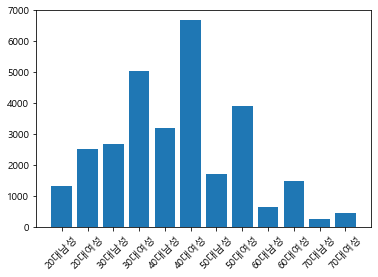

,cust
age_sex,
20대남성,1340
20대여성,2513
30대남성,2696
30대여성,5040
40대남성,3187
40대여성,6676
50대남성,1718
50대여성,3915
60대남성,636


In [9]:
#1-4. 연령+성별 별 분포
d=one[['cust','age_sex']].groupby('age_sex').count()
plt.bar(d.index,d['cust'])
plt.xticks(rotation=45)
plt.show()
d

In [417]:
#1-5. 연령+지역 별 분포
e=one[['cust','age_from']].groupby('age_from').count() 
e.sort_values('cust',ascending=False)

,cust
age_from,
40대Z10,2736
40대Z17,2427
30대Z17,2202
30대Z10,2118
50대Z10,1599
...,...
70대Z01,13
70대Z12,12
60대Z02,11


In [418]:
#1-6. 지역+성별 별 분포
f=one[['cust','sex_from']].groupby('sex_from').count()
f.sort_values('cust',ascending=False)

,cust
sex_from,
여성Z10,5496
여성Z17,5185
남성Z17,2696
남성Z10,2661
여성Z16,1721
여성Z11,1277
여성Z04,1274
남성Z16,782
여성Z06,763


In [420]:
#1-7. 연령+지역+성별 별 분포
g=one[['cust','age_sex_from']].groupby('age_sex_from').count()
g.sort_values('cust',ascending=False)

,cust
age_sex_from,
40대여성Z10,1802
40대여성Z17,1584
30대여성Z17,1397
30대여성Z10,1388
50대여성Z10,1135
...,...
20대남성Z02,6
70대여성Z03,5
70대여성Z12,5


In [13]:
two

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


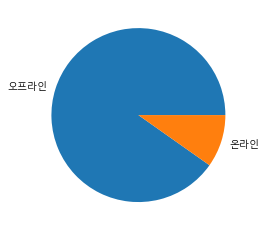

,cust
chnl_dv,
1,3953242
2,428501


In [14]:
#2-1. 채널별 분포
a2=two[['cust','chnl_dv']].groupby('chnl_dv').count()
plt.pie(a2['cust'],labels=['오프라인','온라인'])
plt.show()
a2

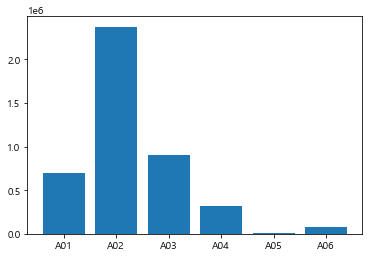

,cust
cop_c,
A01,700350
A02,2374970
A03,905691
A04,316401
A05,8171
A06,76160


In [15]:
#2-2. 제휴사별 분포
b2=two[['cust','cop_c']].groupby('cop_c').count()
plt.bar(b2.index,b2['cust'])
plt.show()
b2

In [16]:
#2-3. 상품코드별 분포
c2=two[['cust','pd_c']].groupby('pd_c').count()
c2.sort_values('cust',ascending=False)

,cust
pd_c,
PD0232,95092
PD1484,88584
PD1156,80265
PD0403,61778
PD0228,56699
...,...
PD0340,1
PD1322,1
PD0615,1


In [17]:
twoloc=two.loc[two['pd_c']=='PD0232']
twoloc
twoloc2=twoloc.groupby('cust').count()
twoloc2.loc[twoloc2['buy_am']>1]
twoloc2.sort_values(('buy_am'))

,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
cust,,,,,,,,,
M999962961,1,1,1,1,1,1,1,1,1
M690515737,1,1,1,1,1,1,1,1,1
M253694015,1,1,1,1,1,1,1,1,1
M691028570,1,1,1,1,1,1,1,1,1
M253642334,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
M354927064,95,95,95,95,95,95,95,95,95
M276294420,101,101,101,101,101,101,101,101,101
M377601122,118,118,118,118,118,118,118,118,118


In [426]:
#2-4. 구매일자별 분포
d2=two[['cust','de_dt']].groupby('de_dt').count()
d2.sort_values('cust',ascending=False)

,cust
de_dt,
20210109,22072
20210501,20307
20210123,20084
20210313,19676
20210227,19436
...,...
20210921,4855
20211109,4807
20211130,4457


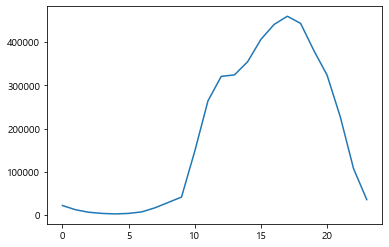

,cust
de_hr,
17,459810
18,443226
16,440927
15,406274
19,380552
14,354803
13,324097
20,323597
12,320699


In [422]:
#2-5. 구매시간별 분포
e2=two[['cust','de_hr']].groupby('de_hr').count()
plt.plot(e2)
plt.show()
e2.sort_values('cust',ascending=False)

In [20]:
three

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


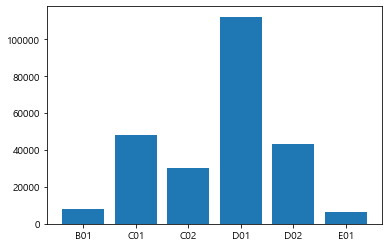

,cust
cop_c,
B01,8103
C01,48323
C02,30258
D01,112232
D02,43134
E01,6254


In [21]:
#3-1. 제휴사별 분포
a3=three[['cust','cop_c']].groupby('cop_c').count()
plt.bar(a3.index,a3['cust'])
plt.show()
a3

In [22]:
#3-2. 점포코드별 분포
b3=three[['cust','br_c']].groupby('br_c').count()
b3.sort_values('cust',ascending=False)

,cust
br_c,
C020002,26171
E010001,5724
C010011,5227
C020004,2363
C010014,2021
...,...
D020185,1
E010008,1
D020390,1


In [23]:
#3-3. 이용일자별 분포
c3=three[['cust','de_dt']].groupby('de_dt').count()
c3.sort_values('cust',ascending=False)

,cust
de_dt,
20210505,1146
20210816,1052
20210619,1047
20210519,1023
20210605,1022
...,...
20210104,338
20201231,45
20201230,9


In [24]:
#3-4. 방문일자별 분포
d3=three[['cust','vst_dt']].groupby('vst_dt').count()
d3.sort_values('cust',ascending=False)

,cust
vst_dt,
20210505,1262
20210519,1198
20210816,1112
20210619,1093
20211106,1079
...,...
20210105,380
20210113,377
20210103,356


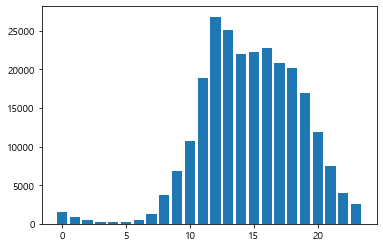

,cust
de_hr,
12,26829
13,25085
16,22734
15,22297
14,21981
17,20846
18,20197
11,18950
19,16932


In [25]:
#3-5. 이용시간별 분포
e3=three[['cust','de_hr']].groupby('de_hr').count()
plt.bar(e3.index,e3['cust'])
plt.show()
e3.sort_values('cust',ascending=False)

In [26]:
#3-6. 방문일자 대비 이용일자별 분포
three['vst-de']=three['vst_dt']-three['de_dt']
f3=three[['cust','vst-de']].groupby('vst-de').count()
f3

,cust
vst-de,
0,232732
1,6819
2,2584
3,1345
4,766
5,729
6,502
7,512
8,385


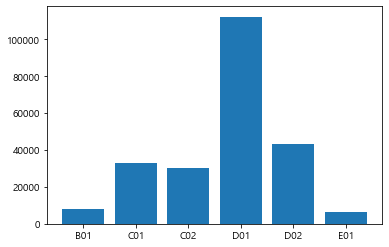

,cust
cop_c,
B01,8103
C01,32751
C02,30258
D01,112232
D02,43134
E01,6254


In [27]:
#3-6. 방문일자 대비 이용일자별 분포2
s1=three.loc[three['vst-de']==0]
s1=s1.groupby('cop_c').count()
plt.bar(s1.index,s1['cust'])
plt.show()
s1[['cust']]
#C01을 제외하곤 모두 방문일자와 이용일자가 같음

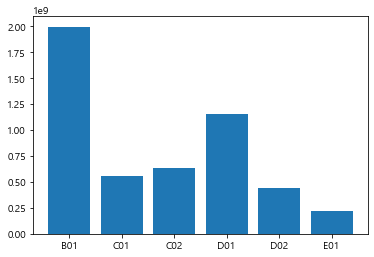

,buy_am
cop_c,
B01,1996255466
C01,558731600
C02,632601296
D01,1155386570
D02,436956040
E01,218592582


In [28]:
#3-7. 제휴사 업종 별 이용금액(평균 / 합계)
#합계
g3=three[['cop_c','buy_am']]
g3=g3.groupby('cop_c').sum()
plt.bar(g3.index,g3['buy_am'])
plt.show()
g3

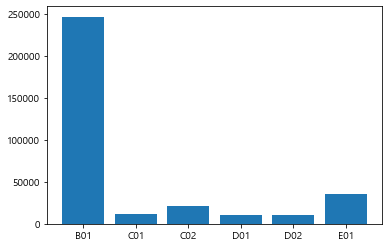

,buy_am
cop_c,
B01,246360.047637
C01,11562.436107
C02,20906.910437
D01,10294.626933
D02,10130.199842
E01,34952.443556


In [29]:
#3-7. 제휴사 업종 별 이용금액(평균 / 합계)
#평균
g3=three[['cop_c','buy_am']]
g3=g3.groupby('cop_c').mean()
plt.bar(g3.index,g3['buy_am'])
plt.show()
g3

In [30]:
four

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


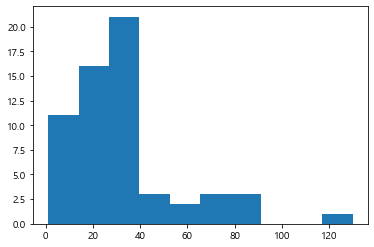

,pd_c
clac_hlv_nm,
패션잡화,130
축산물,91
수산물,88
스포츠패션,82
문구/사무용품,72
채소,72
유아동의류,67
과일,58
속옷/양말/홈웨어,56


In [31]:
#4-1. 상품 분류별 분포
#대분류에 따른 상품갯수의 분포
a4=four.groupby('clac_hlv_nm').count()
a4=a4[['pd_c']]
plt.hist(a4)
plt.show()
a4.sort_values('pd_c',ascending=False)

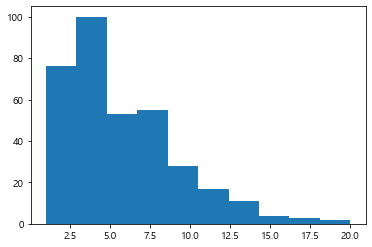

,pd_c
clac_mcls_nm,
어류,20
국산과일,19
주방가전,18
잎채소,18
일반문구/사무용품,17
...,...
남아의류전신,1
특수담배,1
임대매출,1


In [32]:
#중분류에 따른 상품갯수의 분포
a4=four.groupby('clac_mcls_nm').count()
a4=a4[['pd_c']]
plt.hist(a4)
plt.show()
a4.sort_values('pd_c',ascending=False)

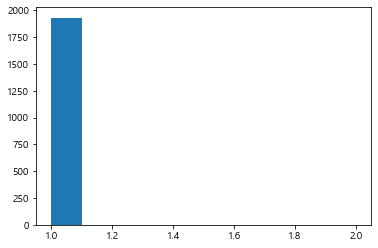

,pd_c
pd_nm,
기타,2
2단우산,1
요가/스포츠매트,1
용기/리필커피,1
용과,1
...,...
물엿/시럽,1
물안경,1
물병,1


In [33]:
#소분류에 따른 상품갯수의 분포
a4=four.groupby('pd_nm').count()
a4=a4[['pd_c']]
plt.hist(a4)
plt.show()
a4.sort_values('pd_c',ascending=False)

In [34]:
five

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


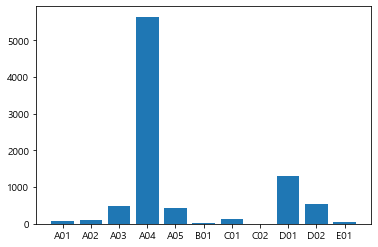

,br_c
cop_c,
A01,66
A02,116
A03,487
A04,5646
A05,440
B01,20
C01,140
C02,4
D01,1311


In [35]:
#5-1. 제휴사별 분포
a5=five.groupby('cop_c').count()
a5=a5[['br_c']]
plt.bar(a5.index,a5['br_c'])
plt.show()
a5

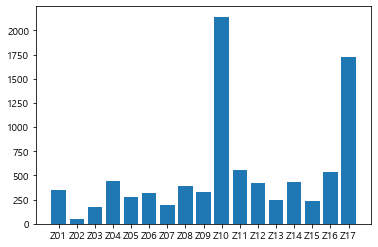

,br_c
zon_hlv,
Z01,353
Z02,53
Z03,171
Z04,440
Z05,276
Z06,321
Z07,197
Z08,386
Z09,324


In [36]:
#5-2. 지역분류별 점포분포 (대분류)
b5=five.groupby('zon_hlv').count()
b5=b5[['br_c']]
plt.bar(b5.index,b5['br_c'])
plt.show()
b5

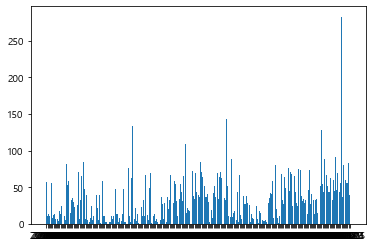

,br_c
zon_mcls,
Z01001,57
Z01002,11
Z01003,13
Z01004,10
Z01005,56
...,...
Z17021,60
Z17022,56
Z17023,56


In [37]:
#5-2. 지역분류별 점포분포 (중분류)
c5=five.groupby('zon_mcls').count()
c5=c5[['br_c']]
plt.bar(c5.index,c5['br_c'])
plt.show()
c5

In [42]:
#지역별 제휴사 분포 
d5=five[['cop_c','zon_hlv']]
d5=pd.get_dummies(d5,columns=['cop_c'])
d5=d5.groupby('zon_hlv').sum()
d5

,cop_c_A01,cop_c_A02,cop_c_A03,cop_c_A04,cop_c_A05,cop_c_B01,cop_c_C01,cop_c_C02,cop_c_D01,cop_c_D02,cop_c_E01
zon_hlv,,,,,,,,,,,
Z01,0.0,3.0,9.0,242.0,15.0,1.0,5.0,0.0,51.0,24.0,3.0
Z02,1.0,0.0,1.0,36.0,3.0,0.0,0.0,0.0,8.0,4.0,0.0
Z03,1.0,2.0,2.0,105.0,11.0,2.0,2.0,0.0,31.0,14.0,1.0
Z04,1.0,10.0,15.0,294.0,27.0,0.0,5.0,0.0,72.0,15.0,1.0
Z05,2.0,5.0,3.0,180.0,13.0,0.0,0.0,0.0,49.0,21.0,3.0
Z06,2.0,6.0,11.0,196.0,22.0,0.0,5.0,0.0,53.0,23.0,3.0
Z07,0.0,1.0,0.0,156.0,5.0,3.0,3.0,0.0,14.0,14.0,1.0
Z08,1.0,5.0,9.0,251.0,20.0,1.0,3.0,0.0,73.0,23.0,0.0
Z09,1.0,5.0,6.0,220.0,15.0,0.0,3.0,0.0,52.0,22.0,0.0


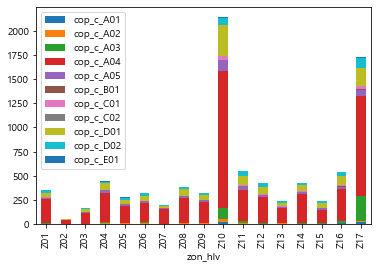

In [43]:
#누적 막대 그래프로 표현
d5=d5.reset_index()
d5.plot.bar(x='zon_hlv',stacked=True)
plt.show()

In [44]:
six

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


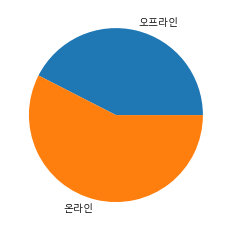

,cust
chnl_dv,
1,150010
2,203174


In [47]:
#6-1. 채널별 분포
a6=six[['cust','chnl_dv']].groupby('chnl_dv').count()
plt.pie(a6['cust'],labels=['오프라인','온라인'])
plt.show()
a6

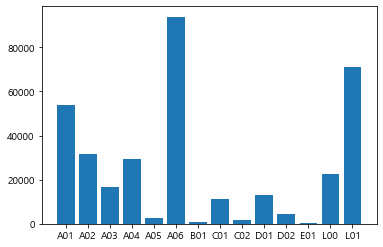

,cust
cop_c,
A01,54026
A02,31778
A03,16477
A04,29243
A05,2604
A06,93869
B01,769
C01,11321
C02,1809


In [52]:
#6-2. 제휴사별 분포
b6=six[['cust','cop_c']].groupby('cop_c').count()
plt.bar(b6.index,b6['cust'])
plt.show()
b6

In [54]:
#6-3. 구매일자별 분포
c6=six[['cust','de_dt']].groupby('de_dt').count()
c6.sort_values('cust',ascending=False)

,cust
de_dt,
20210607,1506
20210802,1426
20210621,1358
20210505,1345
20210426,1342
...,...
20211010,719
20210211,693
20210920,580


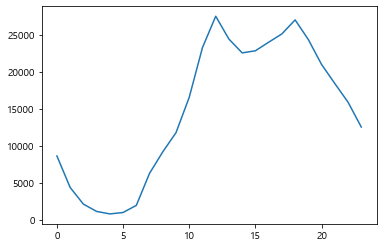

,cust
de_hr,
12,27547
18,27055
17,25155
13,24449
19,24389
16,24031
11,23311
15,22874
14,22589


In [431]:
#6-4. 구매시간별 분포
d6=six[['cust','de_hr']].groupby('de_hr').count()
plt.plot(d6)
plt.show()
d6.sort_values('cust',ascending=False)

In [433]:
#6-5. 동일 지역에서의 제휴사 이용
tw1=two[['cust','cop_c','br_c','chnl_dv','de_dt','de_hr','buy_am']]
th1=three[['cust','cop_c','br_c','chnl_dv','de_dt','de_hr','buy_am']]
test1=pd.concat([tw1,th1])
test1=test1.dropna(axis=0)
test1

,cust,cop_c,br_c,chnl_dv,de_dt,de_hr,buy_am
0,M430112881,A01,A010039,1,20210101,10,15000.0
1,M646853852,A01,A010025,1,20210101,10,79700.0
2,M430112881,A01,A010039,1,20210101,10,19000.0
3,M430112881,A01,A010039,1,20210101,10,19000.0
4,M430112881,A01,A010039,1,20210101,10,19000.0
...,...,...,...,...,...,...,...
248299,M058650684,C02,C020002,1,20211116,14,2000.0
248300,M058650684,C02,C020002,1,20211116,19,26900.0
248301,M014154595,C01,C010087,2,20211212,9,2000.0
248302,M510878172,C01,C010007,2,20211127,19,6000.0


In [434]:
fi1=five[['br_c','zon_hlv','zon_mcls']]
test2=pd.merge(test1,fi1,on='br_c',how='left')
on=one.rename(columns={'zon_hlv':'zon_hlv2'})
test3=pd.merge(test2,on,on='cust',how='left')
test4=test3.loc[test3['zon_hlv']==test3['zon_hlv2']]
test5=test4.groupby('cop_c').count()
test5=test5[['cust']]

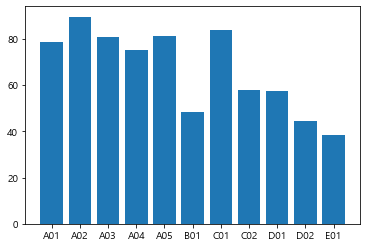

,cust
cop_c,
A01,78.492910
A02,89.477124
A03,80.531150
A04,74.915376
A05,81.091840
B01,48.117981
C01,83.697204
C02,57.680613
D01,57.437273


In [435]:
#동일지역 이용율
test6=test3.groupby('cop_c').count()
test6=test6[['cust']]
test5=test5/test6*100
plt.bar(test5.index,test5['cust'])
plt.show()
test5

In [43]:
#7-1. 온라인 이용중 구매가 많은 순서
two['sum']=two['buy_am']*two['buy_ct']
tet1=two
tet2=tet1.loc[tet1['chnl_dv']==2]
tet2=tet2[['pd_c','cust']]
tet2=tet2.groupby('pd_c').count()
tet2=pd.merge(tet2,four,on='pd_c',how='left')
tet2=tet2.sort_values('cust',ascending=False)
tet2.head(10)

,pd_c,cust,pd_nm,clac_hlv_nm,clac_mcls_nm
187,PD0228,18619,감자스낵,과자,스낵류
857,PD1156,15744,일반우유,유제품,우유
306,PD0403,12693,국물봉지라면,대용식,봉지라면
856,PD1153,11275,일반요구르트,유제품,요구르트
870,PD1173,8297,생수,음료,생수
1108,PD1486,8223,일반계란,축산물,계란류
183,PD0217,6891,크래커,과자,비스킷류
1018,PD1387,6571,두부류,채소,두부/콩나물류
313,PD0413,5563,국물용기라면,대용식,용기라면
305,PD0401,5017,즉석국/찌개,대용식,레토르트


In [54]:
#7-2. 오프라인 이용중 구매금액이 가장 많은 순서
tet3=tet1.loc[tet1['chnl_dv']==1]
tet3=tet3.groupby('pd_c').sum()
tet3=tet3[['sum']]
tet3=pd.merge(tet3,four,on='pd_c',how='left')
tet3=tet3.sort_values('sum',ascending=False)
tet3.head(10)

,pd_c,sum,pd_nm,clac_hlv_nm,clac_mcls_nm
467,PD0497,3.735663e+09,통조림혼합세트,병통조림,병통조림선물세트
1746,PD1827,3.452041e+09,기타패션잡화,패션잡화,패션액세서리
1688,PD1769,2.964918e+09,여성가방액세서리,패션잡화,여성가방
1682,PD1763,2.737727e+09,여성숄더백,패션잡화,여성가방
892,PD0949,2.629875e+09,여성티셔츠/탑,여성의류,여성의류상의
1672,PD1752,2.593226e+09,남성시계,패션잡화,시계
1683,PD1764,2.183271e+09,여성토트백,패션잡화,여성가방
902,PD0959,2.144763e+09,여성재킷,여성의류,여성의류아우터
277,PD0298,1.784418e+09,기타남성의류세트,남성의류,남성의류세트
900,PD0957,1.758883e+09,기타여성의류세트,여성의류,여성의류세트


In [58]:
#7-3. 오프라인 이용중 이용횟수가 가장 많은 순서
tet4=tet1.loc[tet1['chnl_dv']==1]
tet4=tet4.groupby('pd_c').count()
tet4=tet4[['cust']]
tet4=pd.merge(tet4,four,on='pd_c',how='left')
tet4=tet4.sort_values('cust',ascending=False)
tet4.head(10)

,pd_c,cust,pd_nm,clac_hlv_nm,clac_mcls_nm
217,PD0232,94278,일반스낵,과자,스낵류
1413,PD1484,88584,종량제봉투,청소/세탁/욕실용품,청소용품
1090,PD1156,64521,일반우유,유제품,우유
451,PD0480,56412,기타파티/팬시용품,문구/사무용품,파티/팬시용품
381,PD0403,49085,국물봉지라면,대용식,봉지라면
1316,PD1387,48291,두부류,채소,두부/콩나물류
1259,PD1330,46535,국산맥주,주류,맥주
1415,PD1486,43931,일반계란,축산물,계란류
391,PD0413,42605,국물용기라면,대용식,용기라면
1089,PD1155,39968,떠먹는요구르트,유제품,요구르트


In [268]:
#7-4. 상품 대분류별 재구매율/구매율 
tet5=two[['cust','pd_c']]
tet5=pd.merge(tet5,four,on='pd_c',how='left')
tet5=pd.get_dummies(tet5,columns=['clac_hlv_nm'])
tet5=tet5.groupby('cust').sum()
A=[]
B=[]
for i in tet5.columns:
    a=len(tet5.loc[tet5[i]>=2])/len(tet5.loc[tet5[i]>0])*100
    b=len(tet5.loc[tet5[i]>0])/len(tet5.index)*100
    A.append(a)
    B.append(b)
    
A=np.round(A,2)
B=np.round(B,2)
tet6=tet5.transpose()
tet6['재구매율']=A
tet6['구매율']=B
tet6=tet6[['재구매율','구매율']]ㅠ
tet6.sort_values('재구매율',ascending=False)

cust,재구매율,구매율
clac_hlv_nm_과자,90.00,75.38
clac_hlv_nm_채소,89.93,63.73
clac_hlv_nm_대용식,87.90,71.82
clac_hlv_nm_냉장식품,86.36,69.10
clac_hlv_nm_유제품,86.17,67.75
clac_hlv_nm_음료,85.59,70.26
clac_hlv_nm_과일,85.34,65.44
clac_hlv_nm_테넌트/음식점,82.58,65.41
clac_hlv_nm_조미료,82.56,57.33
clac_hlv_nm_축산물,82.43,61.66


In [439]:
#7-5. 상품 소분류별 상관계수 구하기

tet6=two[['cust','pd_c']]
tet6=pd.merge(tet6,four,on='pd_c',how='left')
tet6=tet6.loc[tet6['clac_hlv_nm']=='과자']
tet6=tet6[['cust','clac_mcls_nm']]
tet6=pd.get_dummies(tet6,columns=['clac_mcls_nm'])
tet6=tet6.groupby('cust').sum()
corr_df = tet6.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
s = corr_df.unstack()
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

,,corr
clac_mcls_nm_사탕/캔디,clac_mcls_nm_껌,0.730000
clac_mcls_nm_껌,clac_mcls_nm_사탕/캔디,0.730000
clac_mcls_nm_비스킷류,clac_mcls_nm_스낵류,0.700000
clac_mcls_nm_스낵류,clac_mcls_nm_비스킷류,0.700000
clac_mcls_nm_초콜릿,clac_mcls_nm_사탕/캔디,0.680000
clac_mcls_nm_사탕/캔디,clac_mcls_nm_초콜릿,0.680000
clac_mcls_nm_비스킷류,clac_mcls_nm_초콜릿,0.590000
clac_mcls_nm_초콜릿,clac_mcls_nm_비스킷류,0.590000
clac_mcls_nm_비스킷류,clac_mcls_nm_사탕/캔디,0.570000
clac_mcls_nm_사탕/캔디,clac_mcls_nm_비스킷류,0.570000


In [154]:
test7=two[['cust','pd_c']]

In [158]:
test8=pd.merge(test7,four,on='pd_c',how='left')
test8=pd.get_dummies(test8,columns=['clac_hlv_nm'])
test8=test8.groupby('cust').sum()

In [159]:
corr_df = test8.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
s = corr_df.unstack()
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

,,corr
clac_hlv_nm_채소,clac_hlv_nm_축산물,0.760000
clac_hlv_nm_축산물,clac_hlv_nm_채소,0.760000
clac_hlv_nm_과자,clac_hlv_nm_음료,0.750000
clac_hlv_nm_음료,clac_hlv_nm_과자,0.750000
clac_hlv_nm_채소,clac_hlv_nm_조미료,0.740000
clac_hlv_nm_조미료,clac_hlv_nm_채소,0.740000
clac_hlv_nm_대용식,clac_hlv_nm_과자,0.740000
clac_hlv_nm_과자,clac_hlv_nm_대용식,0.740000
clac_hlv_nm_과일,clac_hlv_nm_채소,0.730000
clac_hlv_nm_대용식,clac_hlv_nm_냉장식품,0.730000


In [205]:
#7-6. 상관관계를 보고 식품으로 묶어서 재구매율 알아보기 
test9=pd.merge(test7,four,on='pd_c',how='left')
test9=test9.replace(['채소','축산물','과자','음료','조미료','대용식','과일','냉장식품','냉동식품','유제품','건해산물','축산물'],'식품')

In [377]:
tet5=pd.get_dummies(test9,columns=['clac_hlv_nm'])
tet5=tet5.groupby('cust').sum()
A=[]
B=[]
for i in tet5.columns:
    a=len(tet5.loc[tet5[i]>=2])/len(tet5.loc[tet5[i]>0])*100
    A.append(a)
    b=len(tet5.loc[tet5[i]>=1])/len(tet5.loc[tet5[i]>=0])*100
    B.append(b)
    
A=np.round(A,2)
B=np.round(B,2)
tet6=tet5.transpose()
tet6['재구매율']=A
tet6['구매율']=B
tet6=tet6[['재구매율','구매율']]
tet6.sort_values('재구매율',ascending=False)

cust,재구매율,구매율
clac_hlv_nm_식품,96.52,89.03
clac_hlv_nm_테넌트/음식점,82.58,65.41
clac_hlv_nm_주류,81.73,53.00
clac_hlv_nm_담배,76.01,11.26
clac_hlv_nm_문구/사무용품,75.00,41.66
clac_hlv_nm_청소/세탁/욕실용품,74.95,51.53
clac_hlv_nm_여성의류,74.86,44.35
clac_hlv_nm_조리식품,74.77,57.17
clac_hlv_nm_여행/레저서비스,74.70,2.17
clac_hlv_nm_남성의류,74.64,42.85


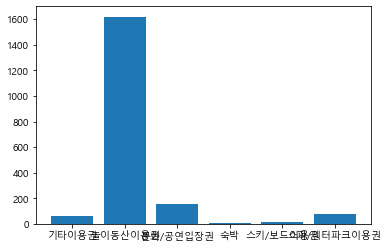

,cust
pd_nm,
기타이용권,65
놀이동산이용권,1619
문화/공연입장권,154
숙박,6
스키/보드이용권,16
스파/워터파크이용권,77


In [448]:
#7-7. 여행/레저서비스 소분류 이용횟수 
test10=test9.loc[test9['clac_hlv_nm']=='여행/레저서비스']
test10=test10[['pd_nm','cust']]
test10=test10.groupby('pd_nm').count()
plt.bar(test10.index,test10['cust'])
plt.show()
test10

In [441]:
#퍼스널케어 상품 소분류 구매횟수 
test10=test9.loc[test9['clac_hlv_nm']=='퍼스널케어']
test10=test10[['pd_nm','cust']]
test10.groupby('pd_nm').count()

,cust
pd_nm,
구강청정제,1691
기타구강관리용품,971
남성용면도기/날,805
데오도란트,246
린스/컨디셔너,1390
바디보습,2271
바디슬리밍/리프팅,69
바디워시,4700
바디케어세트,420


In [216]:
#7-8. 남성 여성 별 최대 구매횟수/구매금액 품목 
two['sum']=two['buy_am']*two['buy_ct']
te1=two[['cust','chnl_dv','pd_c','sum']]
te1=pd.merge(te1,one,on='cust',how='left')
te1=pd.merge(te1,four,on='pd_c',how='left')

,cust,chnl_dv,pd_c,sum,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,1,PD0290,15000.0,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
1,M646853852,1,PD1369,79700.0,여성,40대,Z13,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,1,PD0290,19000.0,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
3,M430112881,1,PD0290,19000.0,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
4,M430112881,1,PD0290,19000.0,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,2,PD0507,50000.0,남성,40대,Z10,백화점/마트모바일상품권,상품권,모바일상품권
4381739,M533286446,2,PD0507,50000.0,남성,40대,Z10,백화점/마트모바일상품권,상품권,모바일상품권
4381740,M533286446,2,PD0507,50000.0,남성,40대,Z10,백화점/마트모바일상품권,상품권,모바일상품권
4381741,M533286446,2,PD0507,50000.0,남성,40대,Z10,백화점/마트모바일상품권,상품권,모바일상품권


In [241]:
tew=te1.loc[te1['ma_fem_dv']=='여성']
tem=te1.loc[te1['ma_fem_dv']=='남성']

In [234]:
#여성 최대 금액 품목
tew=tew.groupby('clac_hlv_nm').sum()
tew.sort_values('sum',ascending=False).head(10)

,chnl_dv,sum
clac_hlv_nm,,
패션잡화,46317,1.611907e+10
여성의류,66782,1.203734e+10
스포츠패션,47673,5.310433e+09
남성의류,51721,4.851265e+09
축산물,162772,4.304347e+09
화장품/뷰티케어,39561,4.001260e+09
냉장/세탁가전,1167,2.663783e+09
과일,188857,2.443287e+09
주류,108083,2.281443e+09


In [235]:
#남성 최대 금액 품목
tem=tem.groupby('clac_hlv_nm').sum()
tem.sort_values('sum',ascending=False).head(10)

,chnl_dv,sum
clac_hlv_nm,,
패션잡화,15654,8.272628e+09
화장품/뷰티케어,9449,4.451935e+09
남성의류,20455,4.165852e+09
스포츠패션,16691,3.762820e+09
병통조림,10198,2.815684e+09
여성의류,13905,2.404171e+09
건강식품,4838,1.400743e+09
주류,61958,1.353473e+09
냉장/세탁가전,613,1.245438e+09


In [244]:
tew=te1.loc[te1['ma_fem_dv']=='여성']
tem=te1.loc[te1['ma_fem_dv']=='남성']

In [245]:
#여성 최대 횟수 품목
tew=tew.groupby('clac_hlv_nm').count()
tew=tew[['cust']]
tew.sort_values('cust',ascending=False).head(10)

,cust
clac_hlv_nm,
채소,317729
과자,310548
대용식,218272
유제품,202722
냉장식품,188646
과일,167968
음료,157388
축산물,140268
테넌트/음식점,122522


In [246]:
#남성 최대 횟수 품목
tem=tem.groupby('clac_hlv_nm').count()
tem=tem[['cust']]
tem.sort_values('cust',ascending=False).head(10)

,cust
clac_hlv_nm,
과자,129675
채소,105449
대용식,93694
음료,92791
유제품,81698
냉장식품,77835
과일,63122
주류,61919
축산물,49794


In [249]:
#7-9. 지역별 구매 총액 높은 품목
tez17=te1.loc[te1['zon_hlv']=='Z17']
tez10=te1.loc[te1['zon_hlv']=='Z10']

In [251]:
tez17=tez17.groupby('clac_hlv_nm').sum()
tez17.sort_values('sum',ascending=False).head(10)

,chnl_dv,sum
clac_hlv_nm,,
패션잡화,17092,9.400730e+09
여성의류,21112,3.950011e+09
스포츠패션,13283,3.117686e+09
남성의류,19600,2.519846e+09
화장품/뷰티케어,14784,1.643754e+09
축산물,69692,1.336822e+09
냉장/세탁가전,541,1.309308e+09
주류,53721,1.253477e+09
과일,82781,1.052939e+09


In [252]:
tez10=tez10.groupby('clac_hlv_nm').sum()
tez10.sort_values('sum',ascending=False).head(10)

,chnl_dv,sum
clac_hlv_nm,,
패션잡화,15756,5.645487e+09
여성의류,18442,3.346209e+09
스포츠패션,15765,2.234078e+09
남성의류,19180,1.764836e+09
냉장/세탁가전,579,1.322755e+09
화장품/뷰티케어,12226,1.246957e+09
축산물,57672,1.225234e+09
주류,46604,9.344544e+08
가구,1145,8.693070e+08


In [360]:
#7-10. 날짜에 따른 구매횟수/ 총구매금액 별 시계열 그래프
#날짜 데이터 칼럼 만들기
two['date']=two['de_dt']*100+two['de_hr']
two['date']=pd.to_datetime(two['date'],format='%Y%m%d%H')

<AxesSubplot:xlabel='date'>

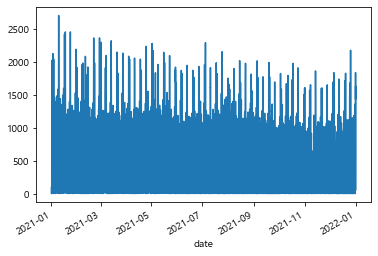

In [361]:
#1년 시계열 그래프 - 횟수
atet1=two[['date','cust','pd_c']]
atet1=pd.merge(atet1,four,on='pd_c',how='left')
counttime=atet1.groupby('date').count()
counttime['cust'].plot()

<AxesSubplot:xlabel='date'>

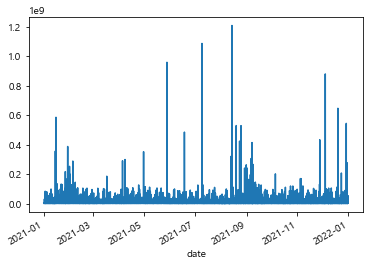

In [388]:
#1년 시계열 그래프 - 구매금액
atet1=two[['date','cust','pd_c','sum']]
atet1=pd.merge(atet1,four,on='pd_c',how='left')
counttime=atet1.groupby('date').sum()
counttime['sum'].plot()

<AxesSubplot:xlabel='date'>

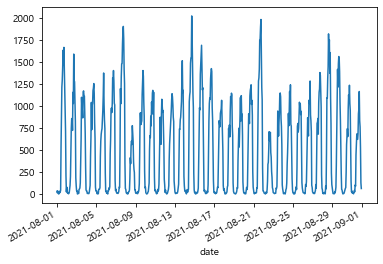

In [411]:
#한달 구매 횟수 시계열 그래프-횟수
m1=atet1.loc[atet1['date'].dt.month==8]
m1=m1.groupby('date').count()
m1['cust'].plot()

<AxesSubplot:xlabel='date'>

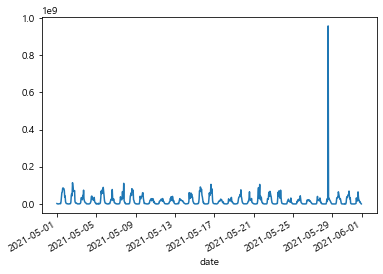

In [403]:
#한달 구매 횟수 시계열 그래프-구매금액
m1=atet1.loc[atet1['date'].dt.month==5]
m1=m1.groupby('date').sum()
m1['sum'].plot()

<AxesSubplot:xlabel='date'>

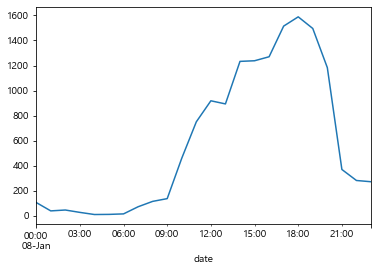

In [375]:
#하루 매 횟수 시계열 그래프-횟수
m1_2=atet1.loc[(atet1['date'].dt.month==1) & (atet1['date'].dt.day==8)]
m1_2=m1_2.groupby('date').count()
m1_2['cust'].plot()

<AxesSubplot:xlabel='date'>

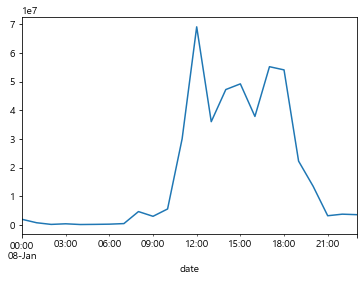

In [390]:
#하루 매 횟수 시계열 그래프-구매금액
m1_2=atet1.loc[(atet1['date'].dt.month==1) & (atet1['date'].dt.day==8)]
m1_2=m1_2.groupby('date').sum()
m1_2['sum'].plot()